<p><font size=5 color="#210F6E"><em><u><center>Fast Data Analysis for English tweets</center></u></em></font><p>
<br>
<font face="Gill Sans" color="#261D7A" size="3.2">As we did before with #PrimaireLeDébat tweets we recovered tweets having the hashtag #Lalaland in the TwitteR_Recover repository</font><br><br>
<font color="#206B50" size = 3><center>**DATA CLEANING**</center></font>

In [17]:
tweets = read.csv("data/Lalaland.csv", encoding="UTF-8")
print(dim(tweets))

tweets <- subset(tweets, select=-c(replyToSN,replyToUID, replyToSID, latitude, longitude, favorited))
#head(tweets, n=5)

[1] 1000   17


In [55]:
clean_text = function(x)
{
    #To convert the text in lowercase
    try.error = function(z)
    {
        y = NA
        try_error = tryCatch(tolower(z), error=function(e) e)
            if (!inherits(try_error, "error"))
                y = tolower(z)
                return(y)
    }
            
    x = sapply(x, try.error)
    
    #Delete #equivalent
    x = gsub("#primaire\\w+ *", "", x)
            
     #remove all links starting by http
    x = gsub('http\\S+\\s*', '', x)
            
    # replace apostrophes
    x = gsub("'", " ", x)

    # remove punctuation except @, #, _, -
    x = gsub("@", "AAAAAAAAAAA", x)
    x = gsub("#", "BBBBBBBBBBB", x)
    x = gsub("_", "CCCCCCCCCCC", x)
    x = gsub("-", "DDDDDDDDDDD", x)
    x = gsub("[[:punct:]]", " ", x)
    x = gsub("AAAAAAAAAAA", "@", x)
    x = gsub("BBBBBBBBBBB", "#", x)
    x = gsub("CCCCCCCCCCC", "_", x)
    x = gsub("DDDDDDDDDDD", "-", x)
            
    # correcting the spaces after the conserved @
    x = gsub("@ ", "@", x)
            
    # correcting the spaces after the conserved _
    x = gsub("_ ", "_", x)
            
    # correcting the spaces after the conserved -
    x = gsub("- ", "-", x)
    
    # remove numbers/Digits
    x = gsub("[[:digit:]]", "", x)
    
    # remove tabs
    x = gsub("[ |\t]{2,}", " ", x)
            
    # remove blank spaces at the beginning/end
    x = gsub("^ ", "", x)  
    x = gsub(" $", "", x)
    
    
    # As we have already a column indicating if the tweet is a retweet or not 
    # we can remove "RT @xxx" in the tweet header
    x = gsub("rt @\\w+ *", "", x)
    x = gsub('\\b\\w{1,3}\\s','', x)
            
    # remove double spaces
    x = gsub("  ", " ", x)
    x = gsub("  ", " ", x)
    return(x)
}
                             
tweets$text <- clean_text(tweets$text)
head(tweets, n = 3)

,text,favoriteCount,created,truncated,id,statusSource,screenName,retweetCount,isRetweet,retweeted
2,favorite actor #lalaland,0,2017-02-01 16:04:54,FALSE,8.268237e+17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",stuffkyletweets,0,FALSE,FALSE
3,effectiveness music #lalaland -,0,2017-02-01 16:03:06,FALSE,8.268232e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",WiddopC,0,FALSE,FALSE
4,#jazzahead #discopolis #jazz #lalaland understanding blakey published tomorrow,0,2017-02-01 16:02:53,TRUE,8.268231e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Stuartnichlson,0,FALSE,FALSE


In [24]:
sum(is.na(tweets$text))

[1] 179

In [25]:
tweets = na.omit(tweets)
tweets$X <- NULL
nrow(tweets)

[1] 821

In [39]:
col = tweets$text
at.pattern = "@\\w+ *"
have.at = grep(x = col, pattern = at.pattern)
at.matches = gregexpr(pattern = at.pattern,
                        text = col[have.at])
extracted.at = regmatches(x = col[have.at], m = at.matches)

# most frequent words
mfw = sort(unlist(extracted.at), decreasing=TRUE)
mfw = gsub(" ", "", mfw)
top40_user_called = sort(table(unlist(mfw)), decreasing=TRUE)
head(top40_user_called, n = 40)


      @grantgust        @lalaland     @ryangosling   @chrismurphyct 
              83               21               21                4 
 @kirstin_taylor        @answered @boywonderrogers     @equalpayact 
               4                2                2                2 
  @gabrielezagni      @interscope          @itunes       @sagawards 
               2                2                2                2 
   @salteditions         @spotify @tyeharris_still  @wittertainment 
               2                2                2                2 
    @womensmarch         @youtube    @alexgdowding      @amosposner 
               2                2                1                1 
       @anniebpd        @assadajd       @bangwrite        @bbcradio 
               1                1                1                1 
          @bblog     @bernajurema         @brejulm    @cgtcatalunya 
               1                1                1                1 
        @chusina      @cines_full

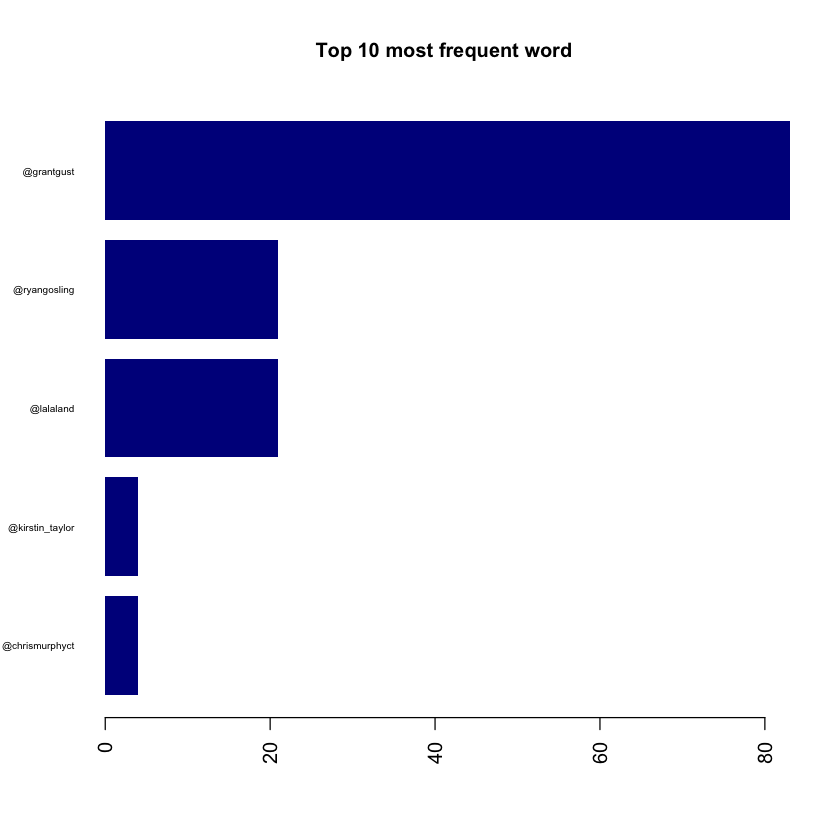

In [46]:
top5 = head(top40_user_called, n = 5)
barplot(sort(top5), border=NA, las=2, main="Top 5 most frequent word", cex.main=1, horiz=TRUE, col= "darkblue", cex.names=0.5)

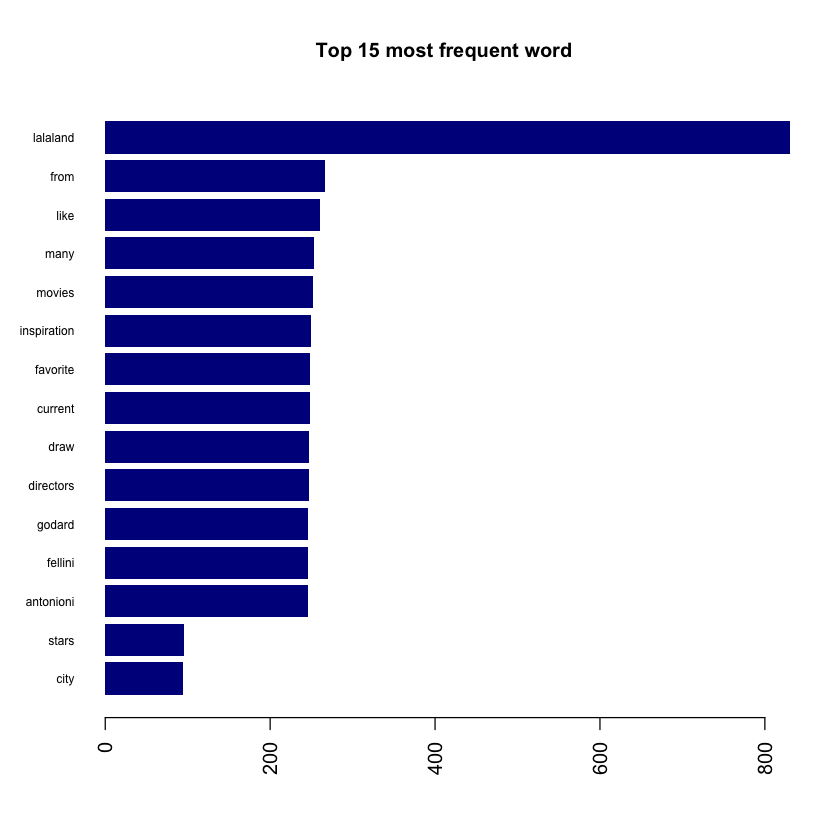

In [47]:
number_Top = function(number){
  topWord = head(w, n = number)
  topWord = sort(topWord, decreasing=FALSE) 
  return(topWord)
}

top15 = number_Top(15)
barplot(top15, border=NA, las=2, main="Top 15 most frequent word", cex.main=1, horiz=TRUE, col= "darkblue", cex.names=0.6)

Sentiment Analysis

In [120]:
library(RSentiment)
#library(sentiment)

sentences = tweets$text

#tweets$score <- calculate_score(tweets$text)
z = head(tweets$text, 750)
classe_emo = calculate_score(z)
classe_emo

[1]  1 -1

text,sentiment
fdp,Neutral
fuck,Negative


Sarcasm,Neutral,Negative,Positive,Very Negative,Very Positive
0,0,1,1,0,0


[1]  1 -1  0  1  1  1  0  0  1 -2  3  0 -3  0  3  1  3  3  0  2  0  0  0  0  0
 [26]  3  1  0  0  3  0  0  0  0  0  0 -1  0  1 -2  3  3  2  0  0  0 -1  2  3 -1
 [51] -1  3  1  3  1  0  3  4 -1  0 -1 -1  2  3  1 -1 -1 -1  0  0  0  0  0  0  0
 [76]  0  0  1  1  1  1 -1  1  0  0  0  0 -1  0  0  1  0 -1  0  0  0  0  0  0  0
[101]  2  1  0  4 -1  0 -1 -1  0  0  2  3  1  0  4 -1  0 -1  0  0  1  0  0  0  0
[126]  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  3  3  0  3  3  0  3  0  0
[151]  0  3  3  0 -3  2  0  3  0  3  0 -1  0  0  3  0  0  1  3  2  0 -1  0  2  0
[176]  2  3  3  1  0  0  0  2  3  0  1  1  0  1  0  0  0  0  3  0 -1 -1  0  4 -1
[201]  3  3  0  3  0  0  0  0  0 -1  0 -1 -1 -1  0  2 -1  3  0  0  0  3  0 -1  3
[226]  3 -1  0 -2  1  3  0  0  1 -2 -1  0  3  0 -2  0  3  0  0 -1  2 -1 -1  0  0
[251]  0  0  3  0  1  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[276]  0  0  0  0  0  0  3  1  0 -2  0  0  0  0  3  0  0  0  0  0  0  0  2  3  0
[301]  3 -1 -1 -1  0  3 -3  3  0  0 -1  2 -1 -1  1  0  0  0  3  1  2 -1 -1  0  1
[326]  0  3  0  0 -1  0  0  0  0  0  0  0  3  0  0  3  3  0  3  0 -1 -1  0 -1  0
[351] -1  2 -1 -1  3  0  3  3  0  0  3  2  0 -1  3 -1 -1  3  3  3  0  0 -1  0 -1
[376]  0  3  0  3  1  0  3  1  1  3 -1  3  3  0  0  0  0  1  0  3  3  3  2  0  0
[401] -1  1  0  0  3 -1  0  0  3  1  0 -1  2 -1 -1  3  1  0  0  0  3  0 -1  1  3
[426]  1  2 -1  1 -1  3  3  0  3  3 -1 -1 -1  0  0  0 -1  2 -1 -1  2  3  3 -1 -1
[451]  3  0 -1 -1  0  0  0  0  3  0  0  0  3  0 -1  0 -1  0  3  3  3  1  1  3  0
[476]  0  3  3  0 -1  3  3  0  3 -1  3  0  1  0  3  0  3  3  3  1  3 -1  3  1  2
[501]  0  3  0  1  3  3  0  0 -2 -1  3  0  0  3  3  0  3 -1  3  1  0  0  0  0  0
[526] -1  0  3  3  1  3  1 -1 -1  3  2  3  1  3  0  1  0  0  3  2 -1  3 -1  0  1
[551]  3  0 -2 -1  3  3  0  0  3  3  3  0  0  0  0  0  3  3  0  1  3  0 -1 -1  0
[576]  0  0  0  3  3  3  0  2  3  3 -1  1  3  3  0  0  0  0  0  0  0  0  0  0  0
[601]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  3  1 -1  0  1  3  3  3  1
[626]  3  0 -1  2 -1 -1  3 -3  0  3  0  3  3  3  3  3  3  0  0  0  3  3  0  3  2
[651]  3  0  0 -1  3  0  0 -1  0  0  0  0  0  0  3 -2  2  0  0  3  3  3  0  4  0
[676]  0  2  0  0  1  3  0  0  2  0  3  3  3  1  3  3  0  0  0  0  3  0  0  1  3
[701] -1  0  3  0  0  3  3  3  3  0  0  0  0  3  3  2  1 -1  0  0  1  1  3  3  3
[726]  0  3  0  2  3  3  3  3  3  0  1  0  3  3  0  3  3  3  0  3  3  1  0  0  0
[751]  0  0  0  1  0  3  3  3  3  0  3  3  3  0 -1  2 -1 -1  0  0  3  2  3  0  3
[776]  0 -1  2 -1 -1  0  0 -1  3  0  3  0 -1  0  3  0  4  3  3  0 -1  2 -1 -1  0
[801] -1  3  0  3  0 -1  2 -1 -1  3  3  0 -2  3  0  0  3  3 -1  0 -1 -1  2  3  3
[826] -1  0  0 -2  3  3  3  0  1  3  3  3  3  0  0  3  0  0 -1  2 -1 -1  3  2  0
[851]  3  1  1  0  3  3  0 -1  3  0  0 -1 -1  3  3  1  0  3  1 -1  0  3  3  0 -1
[876]  0  3  0  0 -1  3  1  0  0  3  3  3  3  2 -1  0 -1  0  3  0  3  3  1  3  0
[901]  1  3  0  0  0  0  3  0  0  3 -1

Loading required package: RColorBrewer


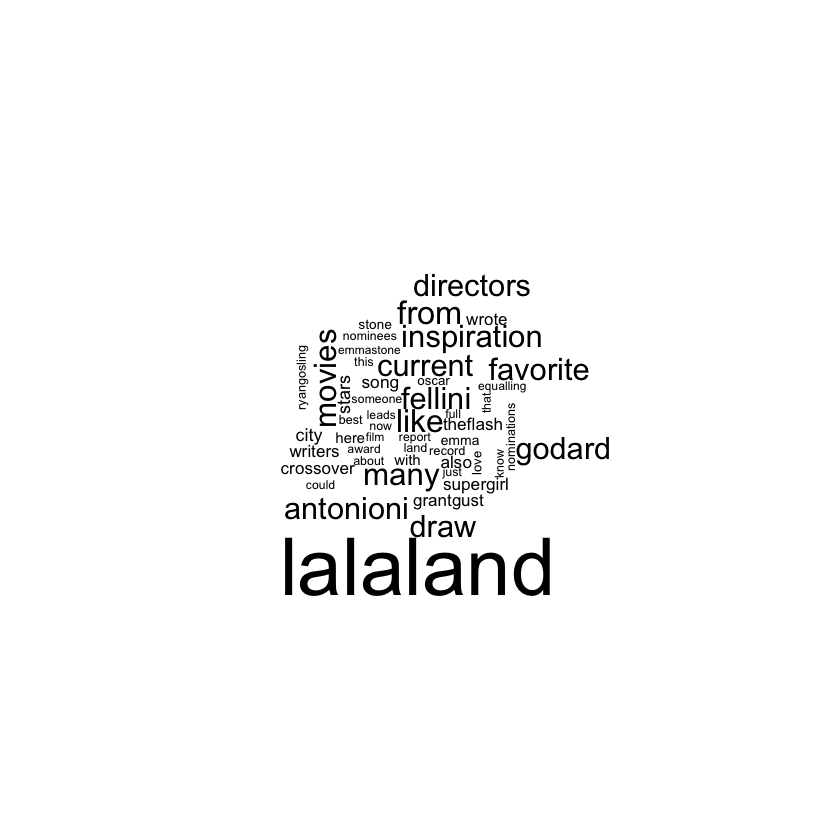

In [49]:
#install.packages("wordcloud")
#install.packages("SnowballC")
library(SnowballC)
library(wordcloud)

top50 = number_Top(50)
wordcloud(names(top50), top50, min.freq=2)

In [ ]:
#require(devtools)
#install_github("lchiffon/wordcloud2")
library(wordcloud2)

top100 = number_Top(100)
cat("The letterCloud function does not work on Jupyter notebook, if you are using markdown, you can uncomment this line.")
#letterCloud(top100, word = "PS", wordSize = 1)